In [1]:
import pandas as pd
import numpy as np

import warnings
from os import listdir
from os.path import isfile, join
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
#import xgboost as xgb

In [2]:
# Creating a dataframe for the training data
df = pd.read_csv("2020_Fall_training_dataset/training_data.csv")

In [3]:
# printing the head of the dataframe
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [4]:
# printing the dimensions of the dataframe for initial research
df.shape

(424431, 69)

In [5]:
# checking for null values in the dataframe for initial analysis
df.isnull().any()

PolicyNo                    False
Policy_Company              False
Policy_Installment_Term     False
Policy_Billing_Code         False
Policy_Method_Of_Payment    False
                            ...  
Claim_Count                 False
Loss_Amount                 False
Frequency                   False
Severity                    False
Loss_Ratio                  False
Length: 69, dtype: bool

In [6]:
# printing the column names of null values in the dataframe for initial analysis
null_list = dict(df.isnull().any())
for key,value in null_list.items():
    if value == True:
        print(key, value)

Vehicle_Bodily_Injury_Limit True
EEA_Prior_Bodily_Injury_Limit True


In [7]:
# printing the dataframe's information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [8]:
# get summary statistics for the dataframe
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000




# Data Visualizations for initial analysis



In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

'''scatter_matrix(df, figsize=(36, 36), diagonal='hist')
plt.show()'''

#sns.set_style('whitegrid')
#sns.pairplot(df,height=10, aspect=0.6)

"scatter_matrix(df, figsize=(36, 36), diagonal='hist')\nplt.show()"

In [10]:
co_relation_matrix = df.corr()

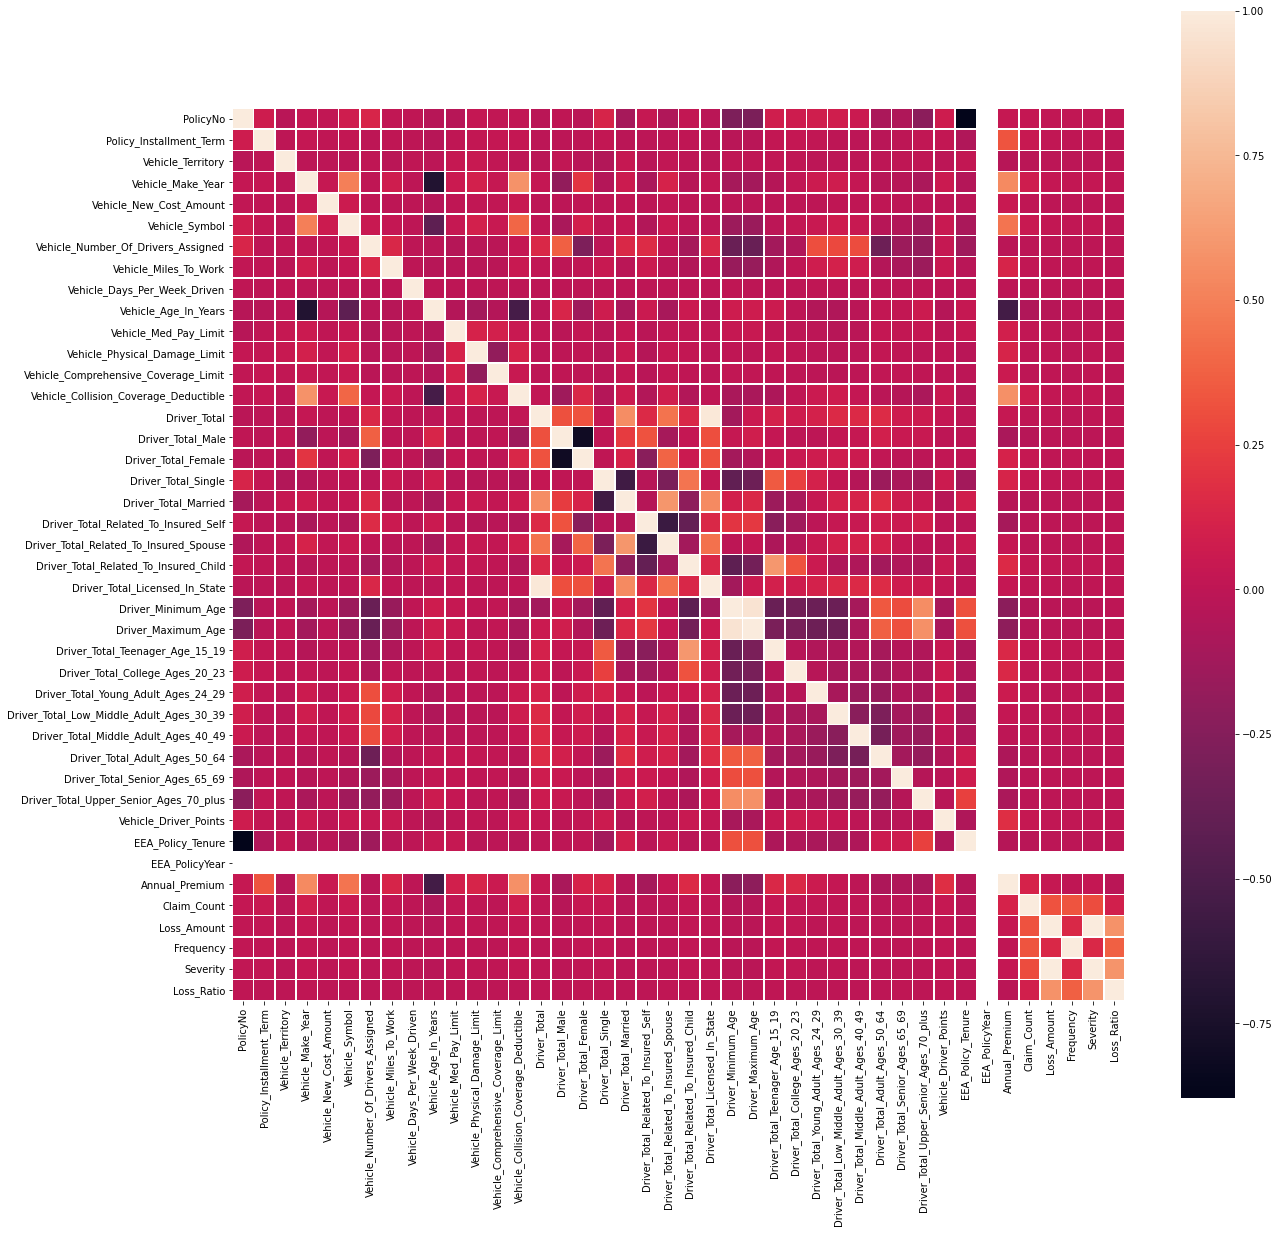

In [11]:
plt.subplots(figsize =(20, 20)) 
sns.heatmap(co_relation_matrix, square = True, linewidths = 0.5)

## From the above heatmap of the co-relation matrix it is clear that there is a huge co-relation between "Driver_Total_Licensed_In_State" and "Driver_total" so lets see what are the 10 columns that are closly related to the "Driver_Total_Licensed_In_State"column using a heatmap.

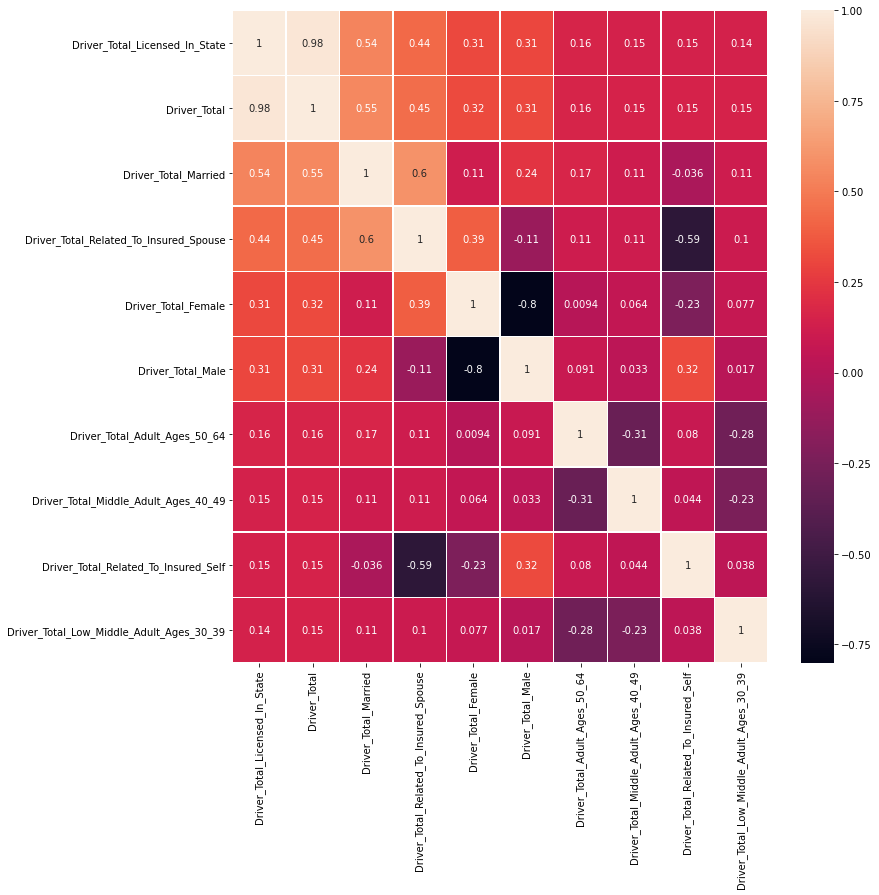

In [12]:
number_of_columns = 10
columns = co_relation_matrix.nlargest(number_of_columns, 'Driver_Total_Licensed_In_State')['Driver_Total_Licensed_In_State'].index 
co_relation_matrix = np.corrcoef(df[columns].values.T) 
plt.subplots(figsize =(12, 12)) 
sns.heatmap(co_relation_matrix,linewidths = 0.5, yticklabels = columns.values,xticklabels = columns.values,annot=True)

## The columns "Driver_Minimum_Age" and "Driver-Maximum_age" also seem to be closely related so lets heck the 10 closely related columns to "Driver_Maximum_Age"

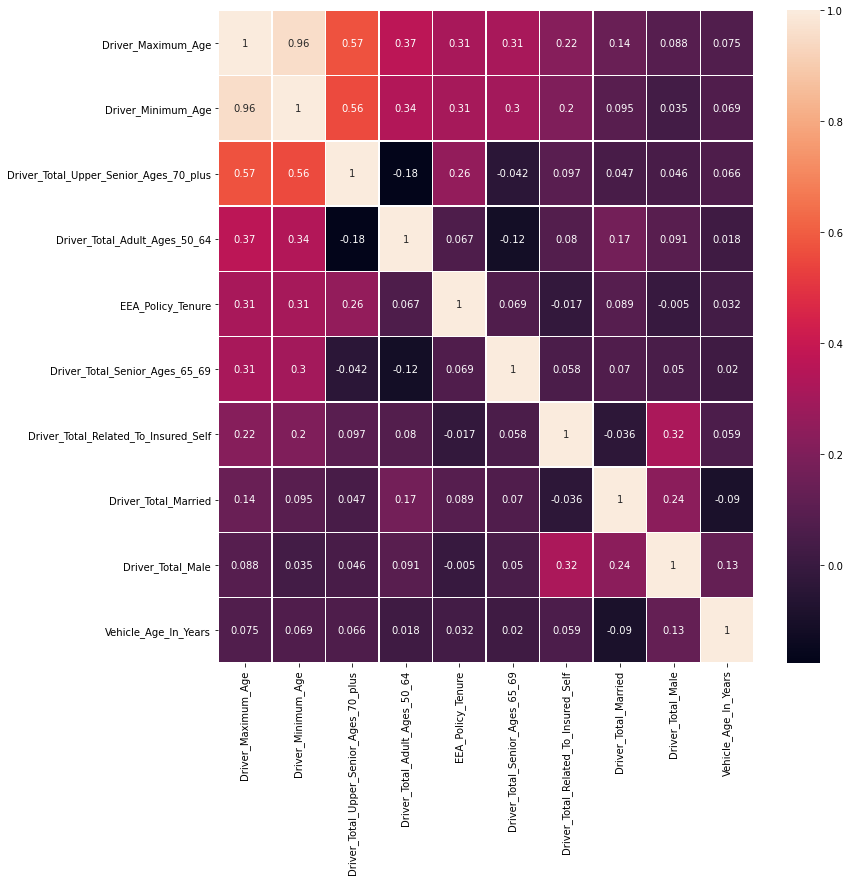

In [13]:
co_relation_matrix1 = df.corr()
columns1 = co_relation_matrix1.nlargest(number_of_columns, 'Driver_Maximum_Age')['Driver_Maximum_Age'].index 
co_relation_matrix1 = np.corrcoef(df[columns1].values.T) 
plt.subplots(figsize =(12, 12)) 
sns.heatmap(co_relation_matrix1,linewidths = 0.5, yticklabels = columns1.values,xticklabels = columns1.values,annot=True)

In [14]:
# Lets get the co-relation values for the loss Amount, anual_permium and IN_LR

loss_amount = df.corr()['Loss_Amount']
anual_permium = df.corr()['Annual_Premium']
Loss_ratio = df.corr()['Loss_Ratio']

print("LOSS AMOUNT CO_RELATION VALUES: \n\n",loss_amount,"\n\n\n",
      "ANUAL PREMIUM CO_RELATION VALUES: \n\n",anual_permium,"\n\n\n",
      "LOSS RATIO CO_RELATION VALUES: \n\n",Loss_ratio)

LOSS AMOUNT CO_RELATION VALUES: 

 PolicyNo                                    0.014785
Policy_Installment_Term                     0.015728
Vehicle_Territory                          -0.005857
Vehicle_Make_Year                           0.027465
Vehicle_New_Cost_Amount                     0.000749
Vehicle_Symbol                              0.021756
Vehicle_Number_Of_Drivers_Assigned         -0.003428
Vehicle_Miles_To_Work                       0.003734
Vehicle_Days_Per_Week_Driven               -0.001793
Vehicle_Age_In_Years                       -0.028379
Vehicle_Med_Pay_Limit                       0.006681
Vehicle_Physical_Damage_Limit               0.006070
Vehicle_Comprehensive_Coverage_Limit        0.003187
Vehicle_Collision_Coverage_Deductible       0.020509
Driver_Total                                0.004486
Driver_Total_Male                          -0.006112
Driver_Total_Female                         0.008930
Driver_Total_Single                         0.014020
Driver_Tota

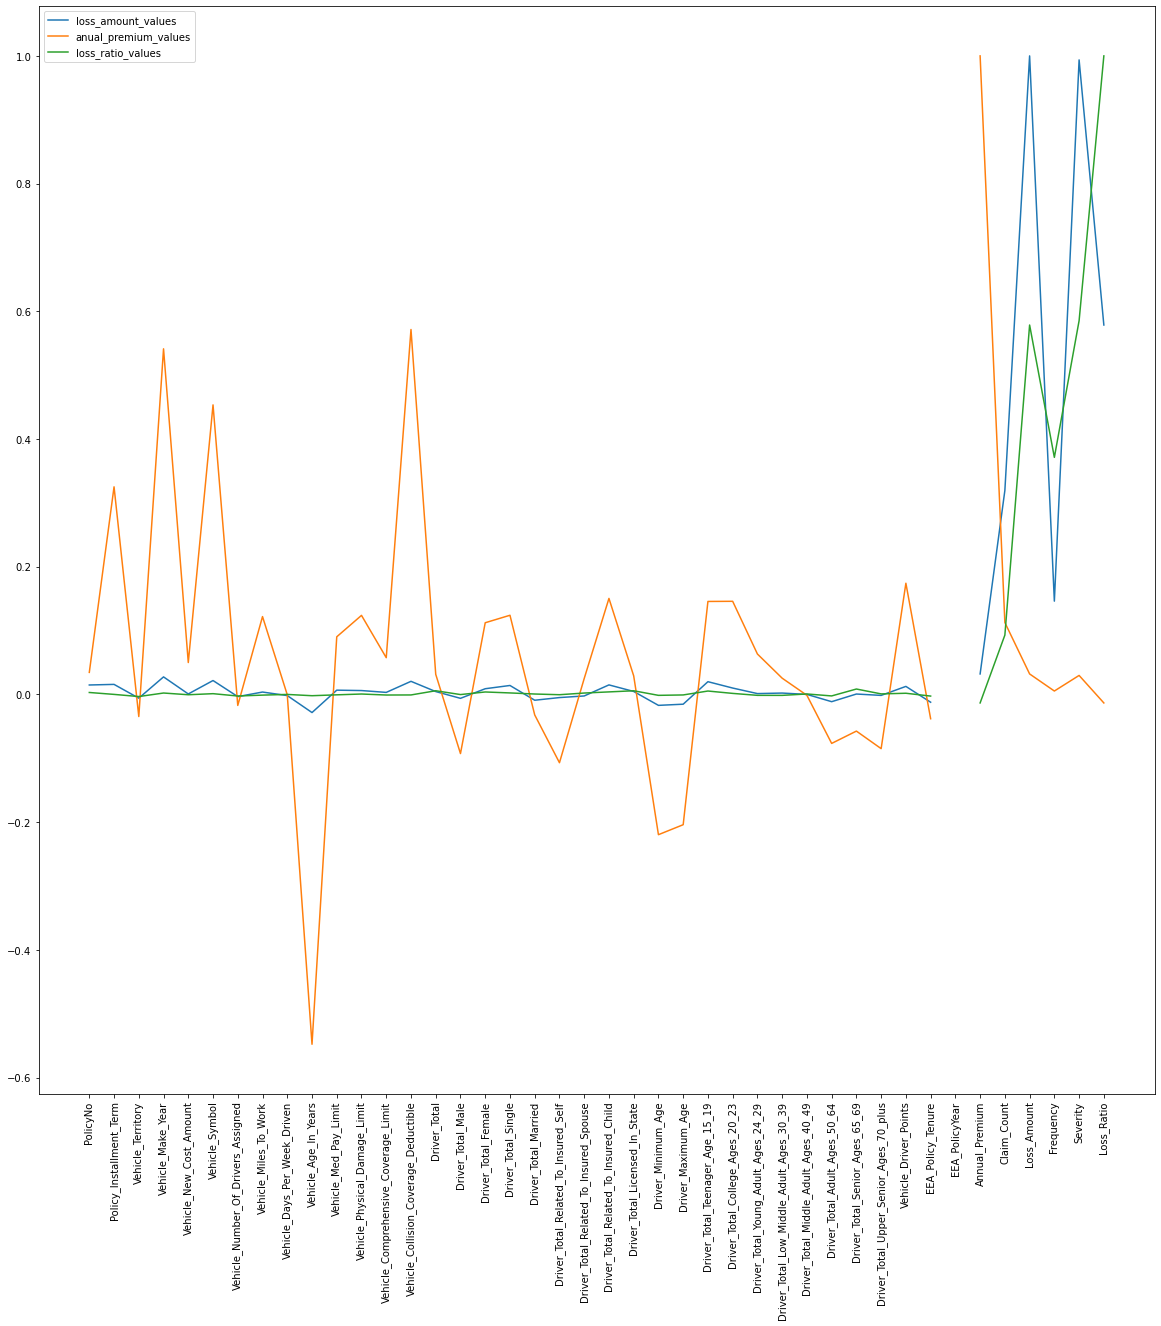

In [15]:
# plot the above co-relation values for the 3 columns 

loss_amount_values = list(loss_amount)
anual_premium_values = list(anual_permium)
loss_ratio_values = list(Loss_ratio)
col_names = []
for key, value in dict(df.corr()['Loss_Amount']).items():
    col_names.append(key)
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(col_names, loss_amount_values, label="loss_amount_values")
ax.plot(col_names, anual_premium_values, label="anual_premium_values")
ax.plot(col_names, loss_ratio_values, label="loss_ratio_values")
ax.legend()
plt.xticks(rotation='vertical')
plt.show()

#sns.barplot(x = col_names, y = loss_amount_values)

In [16]:
#columns_selected will have all the columns which we think are most relavent to the dataset and will be helpful in perdicting IN_LR value.

columns_selected = ['Policy_Installment_Term',
                    'Policy_Reinstatement_Fee_Indicator',
                    'Vehicle_Territory',
                    'Vehicle_Make_Year',
                    'Vehicle_Performance',
                    'Vehicle_Symbol',
                    'Vehicle_Number_Of_Drivers_Assigned',
                    'Vehicle_Days_Per_Week_Driven',
                    'Vehicle_Passive_Restraint',
                    'Vehicle_Age_In_Years',
                    'Vehicle_Med_Pay_Limit',
                    'Vehicle_Bodily_Injury_Limit',
                    'Vehicle_Physical_Damage_Limit',
                    'Vehicle_Comprehensive_Coverage_Indicator',
                    'Vehicle_Collision_Coverage_Indicator',
                    'Driver_Total_Married',
                    'Driver_Minimum_Age',
                    'Driver_Maximum_Age',
                    'Driver_Total_Teenager_Age_15_19',
                    'Driver_Total_Upper_Senior_Ages_70_plus',
                    'Vehicle_Driver_Points',
                    'Vehicle_Youthful_Driver_Indicator',
                    'Vehicle_Safe_Driver_Discount_Indicator',
                    'SYS_Renewed',
                    'SYS_New_Business',
                    'Annual_Premium',
                    'Loss_Amount']

#            ['Driver_Total_Related_To_Insured_Self','Driver_Total_Related_To_Insured_Spouse','Driver_Total_Related_To_Insured_Child',
#            'Driver_Total_Licensed_In_State','Driver_Total_College_Ages_20_23',
#            'Driver_Total_Young_Adult_Ages_24_29','Driver_Total_Low_Middle_Adult_Ages_30_39',
#            'Driver_Total_Middle_Adult_Ages_40_49','Driver_Total_Adult_Ages_50_64',
#            'Driver_Total_Senior_Ages_65_69','EEA_Policy_Tenure','EEA_PolicyYear',
#            'Driver_Total','Driver_Total_Male','Driver_Total_Female','Driver_Total_Single']

In [17]:
#filter the dataset and just have the information of the above selected columns and print the head.
df = df[columns_selected]
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Days_Per_Week_Driven,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,...,Driver_Maximum_Age,Driver_Total_Teenager_Age_15_19,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,Vehicle_Youthful_Driver_Indicator,Vehicle_Safe_Driver_Discount_Indicator,SYS_Renewed,SYS_New_Business,Annual_Premium,Loss_Amount
0,6,N,35,2004,Standard,11,1,5,Y,3,...,75,0,1,0,N,Y,Y,N,320.12,0.0
1,6,N,35,1980,Standard,11,1,5,N,9,...,71,0,1,0,N,Y,Y,N,259.70,0.0
2,6,N,17,2005,Standard,10,1,5,Y,2,...,80,0,1,0,N,Y,Y,N,613.74,0.0
3,6,N,17,2005,Standard,12,1,5,Y,2,...,74,0,1,0,N,Y,Y,N,541.66,0.0
4,6,N,17,2005,Standard,12,1,5,Y,2,...,75,0,1,0,N,Y,Y,N,541.66,0.0


In [18]:
df.dtypes

Policy_Installment_Term                       int64
Policy_Reinstatement_Fee_Indicator           object
Vehicle_Territory                             int64
Vehicle_Make_Year                             int64
Vehicle_Performance                          object
Vehicle_Symbol                                int64
Vehicle_Number_Of_Drivers_Assigned            int64
Vehicle_Days_Per_Week_Driven                  int64
Vehicle_Passive_Restraint                    object
Vehicle_Age_In_Years                          int64
Vehicle_Med_Pay_Limit                         int64
Vehicle_Bodily_Injury_Limit                  object
Vehicle_Physical_Damage_Limit                 int64
Vehicle_Comprehensive_Coverage_Indicator     object
Vehicle_Collision_Coverage_Indicator         object
Driver_Total_Married                          int64
Driver_Minimum_Age                            int64
Driver_Maximum_Age                            int64
Driver_Total_Teenager_Age_15_19               int64
Driver_Total

In [19]:
# Check if any columns have "NAN" or "UNKNOWN" or any kind of categorical values and print the COLUMN NAMES.

nan_and_categorical = dict(df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()))
for key,value in nan_and_categorical.items():
    if value == False:
        print(key)

Policy_Reinstatement_Fee_Indicator
Vehicle_Performance
Vehicle_Passive_Restraint
Vehicle_Bodily_Injury_Limit
Vehicle_Comprehensive_Coverage_Indicator
Vehicle_Collision_Coverage_Indicator
Vehicle_Youthful_Driver_Indicator
Vehicle_Safe_Driver_Discount_Indicator
SYS_Renewed
SYS_New_Business


In [20]:
# From the above list if we check the dataset we can see that the "VEHICLE_SYMBOL", "Vehicle_Bodily_Injury_Limit"
# is of type integer and has non int values so lets replace those with "-1" and NA respectively and then drom them

df["Vehicle_Symbol"].replace(-1, np.NaN, inplace = True)
df['Vehicle_Bodily_Injury_Limit'].replace('NA', np.NaN, inplace=True)
df.dropna(subset=['Vehicle_Symbol'], inplace=True)

df = df.astype({'Vehicle_Symbol': 'int', 'Annual_Premium': 'int', 'Loss_Amount': 'int'})

In [21]:
df.dtypes

Policy_Installment_Term                      int64
Policy_Reinstatement_Fee_Indicator          object
Vehicle_Territory                            int64
Vehicle_Make_Year                            int64
Vehicle_Performance                         object
Vehicle_Symbol                               int32
Vehicle_Number_Of_Drivers_Assigned           int64
Vehicle_Days_Per_Week_Driven                 int64
Vehicle_Passive_Restraint                   object
Vehicle_Age_In_Years                         int64
Vehicle_Med_Pay_Limit                        int64
Vehicle_Bodily_Injury_Limit                 object
Vehicle_Physical_Damage_Limit                int64
Vehicle_Comprehensive_Coverage_Indicator    object
Vehicle_Collision_Coverage_Indicator        object
Driver_Total_Married                         int64
Driver_Minimum_Age                           int64
Driver_Maximum_Age                           int64
Driver_Total_Teenager_Age_15_19              int64
Driver_Total_Upper_Senior_Ages_

In [22]:
# create a list with all the categorical columns and then build a pipeline of sorts to convert the categorical values into 
# numerical or integer type values.

categorical_columns = ['Policy_Reinstatement_Fee_Indicator',
                       'Vehicle_Performance',
                       #'Vehicle_Passive_Restraint',
                       #'Vehicle_Bodily_Injury_Limit',
                       'Vehicle_Comprehensive_Coverage_Indicator',
                       'Vehicle_Collision_Coverage_Indicator',
                       'Vehicle_Youthful_Driver_Indicator',
                       'Vehicle_Safe_Driver_Discount_Indicator',
                       'SYS_Renewed',
                       'SYS_New_Business'
                      ]

# get_dummies function will convert the categorical values into different columns with ranges and hese new columns would be 
# of type integer
'''df = pd.get_dummies(df, columns = categorical_columns, prefix_sep = "_")
df.isnull().sum()'''

lb_make = LabelEncoder()
for col in categorical_columns:
    df[col+"_code"] = lb_make.fit_transform(df[col])


In [23]:
df["Vehicle_Passive_Restraint"].value_counts()
df["Vehicle_Passive_Restraint_code"] = np.where(df["Vehicle_Passive_Restraint"].str.contains("Y"), 1,0)
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Days_Per_Week_Driven,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,...,Loss_Amount,Policy_Reinstatement_Fee_Indicator_code,Vehicle_Performance_code,Vehicle_Comprehensive_Coverage_Indicator_code,Vehicle_Collision_Coverage_Indicator_code,Vehicle_Youthful_Driver_Indicator_code,Vehicle_Safe_Driver_Discount_Indicator_code,SYS_Renewed_code,SYS_New_Business_code,Vehicle_Passive_Restraint_code
0,6,N,35,2004,Standard,11,1,5,Y,3,...,0,0,4,0,1,0,1,1,0,1
1,6,N,35,1980,Standard,11,1,5,N,9,...,0,0,4,0,1,0,1,1,0,0
2,6,N,17,2005,Standard,10,1,5,Y,2,...,0,0,4,0,1,0,1,1,0,1
3,6,N,17,2005,Standard,12,1,5,Y,2,...,0,0,4,0,1,0,1,1,0,1
4,6,N,17,2005,Standard,12,1,5,Y,2,...,0,0,4,0,1,0,1,1,0,1


In [24]:
df["Vehicle_Bodily_Injury_Limit"] = df["Vehicle_Bodily_Injury_Limit"].astype('category')
df["Vehicle_Bodily_Injury_Limit_code"] = df["Vehicle_Bodily_Injury_Limit"].cat.codes

In [25]:
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Days_Per_Week_Driven,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,...,Policy_Reinstatement_Fee_Indicator_code,Vehicle_Performance_code,Vehicle_Comprehensive_Coverage_Indicator_code,Vehicle_Collision_Coverage_Indicator_code,Vehicle_Youthful_Driver_Indicator_code,Vehicle_Safe_Driver_Discount_Indicator_code,SYS_Renewed_code,SYS_New_Business_code,Vehicle_Passive_Restraint_code,Vehicle_Bodily_Injury_Limit_code
0,6,N,35,2004,Standard,11,1,5,Y,3,...,0,4,0,1,0,1,1,0,1,4
1,6,N,35,1980,Standard,11,1,5,N,9,...,0,4,0,1,0,1,1,0,0,0
2,6,N,17,2005,Standard,10,1,5,Y,2,...,0,4,0,1,0,1,1,0,1,4
3,6,N,17,2005,Standard,12,1,5,Y,2,...,0,4,0,1,0,1,1,0,1,6
4,6,N,17,2005,Standard,12,1,5,Y,2,...,0,4,0,1,0,1,1,0,1,6


In [26]:
df.drop(columns = ['Policy_Reinstatement_Fee_Indicator','Vehicle_Performance','Vehicle_Passive_Restraint',
                   'Vehicle_Bodily_Injury_Limit','Vehicle_Comprehensive_Coverage_Indicator',
                   'Vehicle_Collision_Coverage_Indicator','Vehicle_Youthful_Driver_Indicator',
                   'Vehicle_Safe_Driver_Discount_Indicator','SYS_Renewed','SYS_New_Business'], axis = 1, inplace = True) 

# Building Models

In [27]:
df.head()

,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit,Driver_Total_Married,...,Policy_Reinstatement_Fee_Indicator_code,Vehicle_Performance_code,Vehicle_Comprehensive_Coverage_Indicator_code,Vehicle_Collision_Coverage_Indicator_code,Vehicle_Youthful_Driver_Indicator_code,Vehicle_Safe_Driver_Discount_Indicator_code,SYS_Renewed_code,SYS_New_Business_code,Vehicle_Passive_Restraint_code,Vehicle_Bodily_Injury_Limit_code
0,6,35,2004,11,1,5,3,1000,100000,0,...,0,4,0,1,0,1,1,0,1,4
1,6,35,1980,11,1,5,9,2000,50000,1,...,0,4,0,1,0,1,1,0,0,0
2,6,17,2005,10,1,5,2,50000,100000,1,...,0,4,0,1,0,1,1,0,1,4
3,6,17,2005,12,1,5,2,5000,35000,1,...,0,4,0,1,0,1,1,0,1,6
4,6,17,2005,12,1,5,2,5000,35000,1,...,0,4,0,1,0,1,1,0,1,6


In [28]:
X_train, X_valid, Y_train, Y_valid = train_test_split(df.drop(['Loss_Amount'],axis=1), df['Loss_Amount'], test_size = 0.2)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_valid_scaled = sc.fit_transform(X_valid)

In [29]:
'''from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
clf_RF.fit(X_train_scaled, Y_train)'''

'from sklearn.ensemble import RandomForestClassifier\nclf_RF = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)\nclf_RF.fit(X_train_scaled, Y_train)'

   ## 1. Linear Regression Model

In [30]:
model_1 = LinearRegression()
model_1.fit(X_train_scaled, Y_train)

LinearRegression()

MSE : 11812010.36545009
RMSE : 3436.860539133075
MAE :  445.4849037146789
R^2 score:   0.003114087687504541


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for training set')

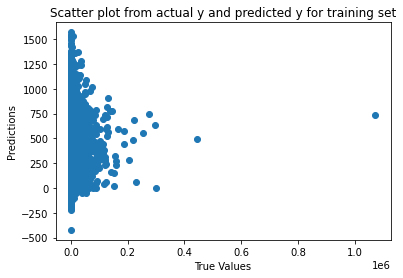

In [31]:
Y_train_predict = model_1.predict(X_train_scaled)
r2 = r2_score(Y_train, Y_train_predict)

mse = np.mean((Y_train - Y_train_predict)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_train, Y_train_predict)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_train, Y_train_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for training set')

MSE : 10337531.733264817
RMSE : 3215.2032180353417
MAE :  459.02104446215645
R^2 score:   0.004100159605316622


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for validation set')

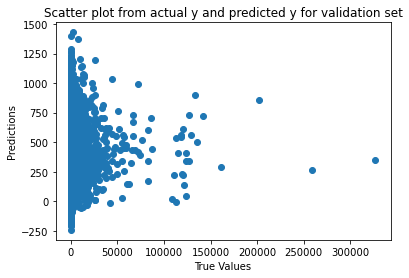

In [32]:
Y_valid_predict = model_1.predict(X_valid_scaled)
r2 = r2_score(Y_valid, Y_valid_predict)

mse = np.mean((Y_valid - Y_valid_predict)**2, axis = None)

print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Y_valid_predict)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_valid, Y_valid_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for validation set')

In [33]:
import lightgbm as lgb
boost1  = lgb.LGBMRegressor()
boost1.fit(X_train, Y_train)

Ytest_predict_boost1 = boost1.predict(X_valid)

mse = np.mean((Y_valid - Ytest_predict_boost1)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Ytest_predict_boost1)
print("MAE : ", mae)

# Calculating the r2 score
r2 = r2_score(Y_valid, Ytest_predict_boost1)
print("r2 score :", r2)

plt.scatter(Y_valid, Ytest_predict_boost1)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

ModuleNotFoundError: No module named 'lightgbm'

# SGD Regression

MSE : 9617444.830940887
RMSE : 3101.20054671427
MAE :  643.3035800599598
R^2 score:   -0.04242700430542046


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for training set')

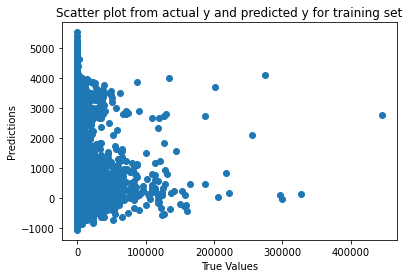

In [34]:
from sklearn.linear_model import SGDRegressor
n_iter=10
SGD = SGDRegressor(max_iter=n_iter)

SGD.fit(X_train_scaled, Y_train)

y_train_sgd_pred = SGD.predict(X_train_scaled)

r2 = r2_score(Y_train, y_train_sgd_pred)

mse = np.mean((Y_train - y_train_sgd_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_train, y_train_sgd_pred)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_train, y_train_sgd_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for training set')



MSE : 21272456.983693734
RMSE : 4612.20738732483
MAE :  645.2341742293079
r2 score : -0.01920021497475366


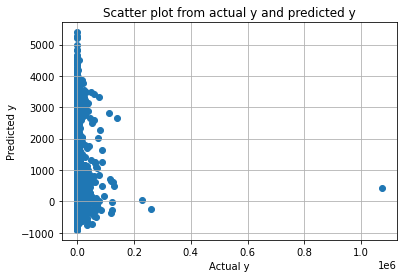

In [35]:
y_valid_sgd_pred=SGD.predict(X_valid_scaled)
# calculating the mean squared error
mse = np.mean((Y_valid - y_valid_sgd_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, y_valid_sgd_pred)
print("MAE : ", mae)

# Calculating the r2 score
r2 = r2_score(Y_valid, y_valid_sgd_pred)
print("r2 score :", r2)

plt.scatter(Y_valid, y_valid_sgd_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [36]:
predictions = []
loss_amount = []
portfolio_names = []

mypath = "2020_Fall_testing_portfolios/testing_portfolios"
test_portfolios = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#print(len(portfolios))

for idx,file in enumerate(test_portfolios):
    test_data = pd.read_csv(mypath + '/' + file)
    test_data = test_data[columns_selected[:len(columns_selected) - 1]]
    
    
    lb_make = LabelEncoder()
    for col in categorical_columns:
        test_data[col+"_code"] = lb_make.fit_transform(test_data[col])
    
    test_data["Vehicle_Passive_Restraint"].value_counts()
    test_data["Vehicle_Passive_Restraint_code"] = np.where(test_data["Vehicle_Passive_Restraint"].str.contains("Y"), 1,0)

    test_data["Vehicle_Bodily_Injury_Limit"] = test_data["Vehicle_Bodily_Injury_Limit"].astype('category')
    test_data["Vehicle_Bodily_Injury_Limit_code"] = test_data["Vehicle_Bodily_Injury_Limit"].cat.codes
    
    test_data.drop(columns = ['Policy_Reinstatement_Fee_Indicator','Vehicle_Performance','Vehicle_Passive_Restraint',
                   'Vehicle_Bodily_Injury_Limit','Vehicle_Comprehensive_Coverage_Indicator',
                   'Vehicle_Collision_Coverage_Indicator','Vehicle_Youthful_Driver_Indicator',
                   'Vehicle_Safe_Driver_Discount_Indicator','SYS_Renewed','SYS_New_Business'], axis = 1, inplace = True)
    
    test_data_scaled = sc.fit_transform(test_data)
    pred_lossAmount = SGD.predict(test_data_scaled)
    loss_amount.append(pred_lossAmount)
    final_results = np.log(sum(pred_lossAmount)/sum(test_data['Annual_Premium']))
    predictions.append(final_results)

for idx,file in enumerate(test_portfolios):
    temp = file.split("_")
    num = temp[2].split(".")
    name = str(temp[1]+"_"+num[0])
    portfolio_names.append(name)
#print(portfolio_names)
export_data = {"ID": portfolio_names, "ln_LR" : predictions}
export_df = pd.DataFrame(export_data)
print(export_df)

#excel_exported = export_df.to_csv (r'testing_prediction_results.csv', index = None, header=True)

                ID     ln_LR
0      portfolio_1 -0.204602
1     portfolio_10 -0.240846
2     portfolio_11 -0.183234
3    portfolio_111 -0.222131
4    portfolio_112 -0.242117
..             ...       ...
325   portfolio_69 -0.231861
326    portfolio_7 -0.212462
327   portfolio_70 -0.209413
328    portfolio_8 -0.219869
329    portfolio_9 -0.211739

[330 rows x 2 columns]


In [ ]:
#excel_exported = export_df.to_csv (r'testing_prediction_results.csv', index = None, header=True)